# sector 5

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s5.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

137913 after maybeTransit, 42.65869456284373% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
4,/tmp/tess/tesslcs_sector_5_104/tesslcs_tmag_10...,176317629,-17.15778,-7.34935,1441.28681,1.17537,0.00100,0.27119,10.64558,8.16971,...,417.88826,355.30459,3.26475,2.77582,0.00075,0.00069,0.00052,0.00048,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
5,/tmp/tess/tesslcs_sector_5_104/2_min_cadence_t...,100609857,-7.36515,-1.91251,1444.63897,0.96264,0.00000,1487.37078,-29.93320,0.00000,...,1307.70766,1360.16381,4.24580,4.41612,0.00022,0.00023,0.00018,0.00018,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
7,/tmp/tess/tesslcs_sector_5_104/tesslcs_tmag_10...,293636356,-6.65958,-3.22531,1442.68300,1.00006,0.00170,0.50234,-0.67808,4.49999,...,927.08047,927.02519,9.46000,9.45944,0.00113,0.00113,0.00088,0.00088,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
9,/tmp/tess/tesslcs_sector_5_104/tesslcs_tmag_10...,150270990,-2.08510,-2.31000,1459.51106,0.98567,0.00000,210.69551,-29.99999,0.00000,...,491.41146,498.69832,1.89004,1.91807,0.00057,0.00057,0.00046,0.00047,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
12,/tmp/tess/tesslcs_sector_5_104/tesslcs_tmag_10...,77843142,-4.88491,-4.50082,1459.24343,1.02095,0.00017,0.15324,-3.13157,4.22829,...,28.95950,28.28539,0.90498,0.88392,0.00035,0.00035,0.00028,0.00029,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

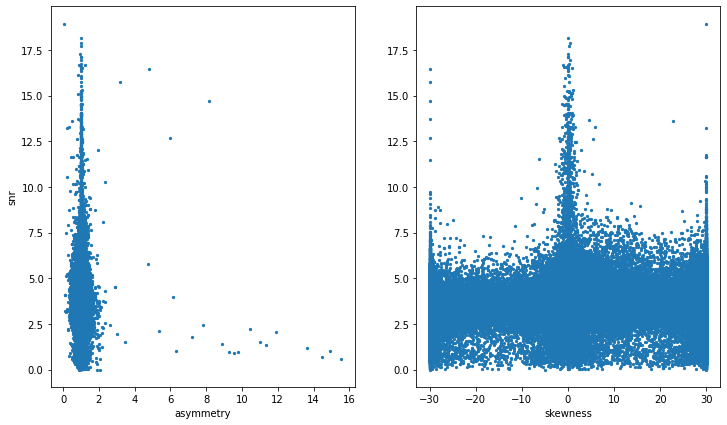

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

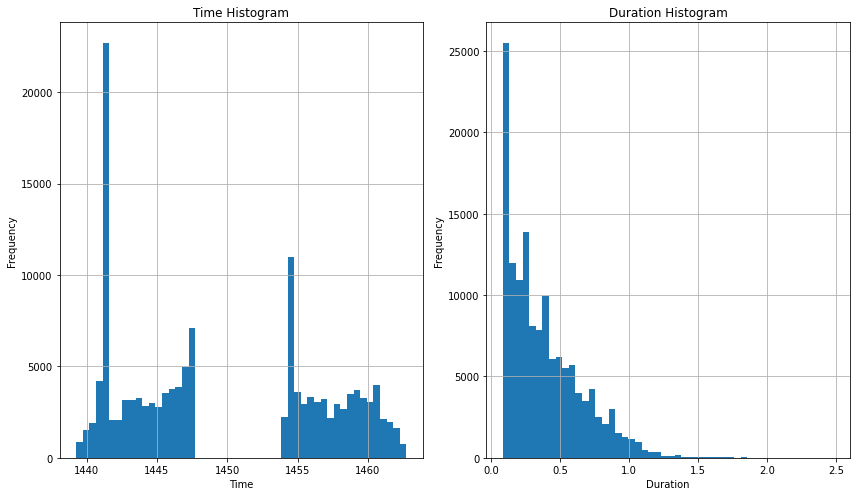

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

8198

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

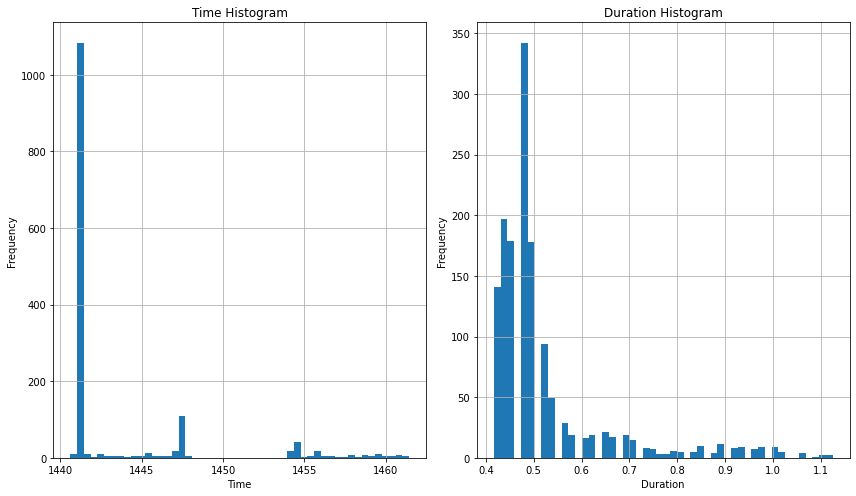

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

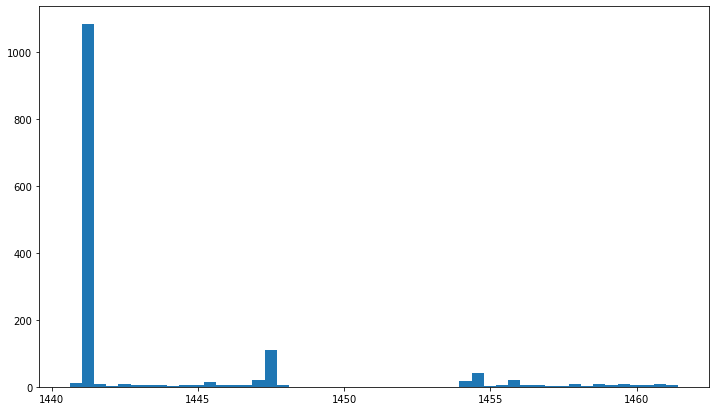

In [13]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [14]:
hist_values

array([1.100e+01, 1.083e+03, 9.000e+00, 1.000e+00, 9.000e+00, 6.000e+00,
       5.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 1.300e+01,
       5.000e+00, 4.000e+00, 5.000e+00, 1.900e+01, 1.090e+02, 6.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.800e+01, 4.100e+01, 3.000e+00, 4.000e+00,
       1.900e+01, 4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 8.000e+00,
       2.000e+00, 8.000e+00, 4.000e+00, 9.000e+00, 4.000e+00, 6.000e+00,
       7.000e+00, 5.000e+00])

In [15]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [16]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1441.0369898000001 start of bin
1441.4531596000002 end of bin
1083.0 number of lcs


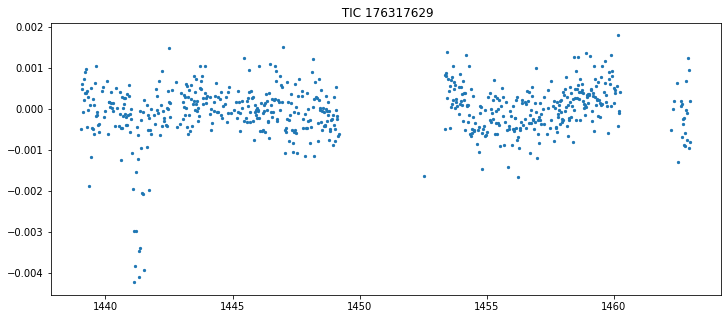

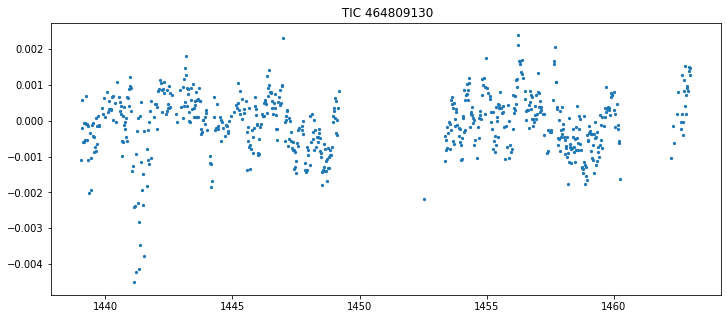

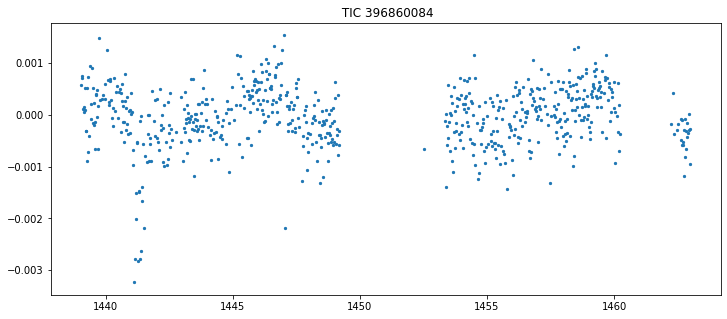

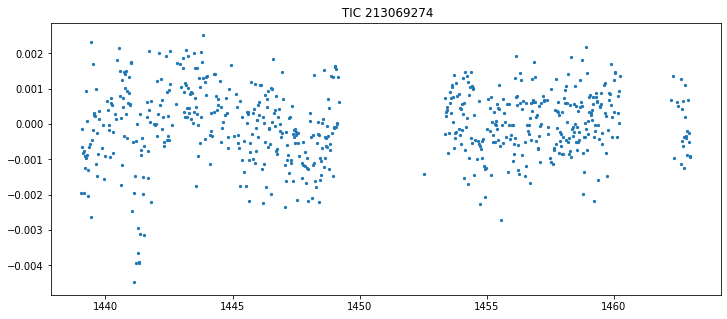

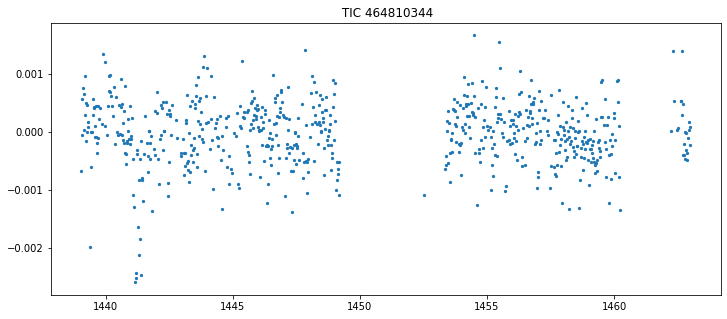

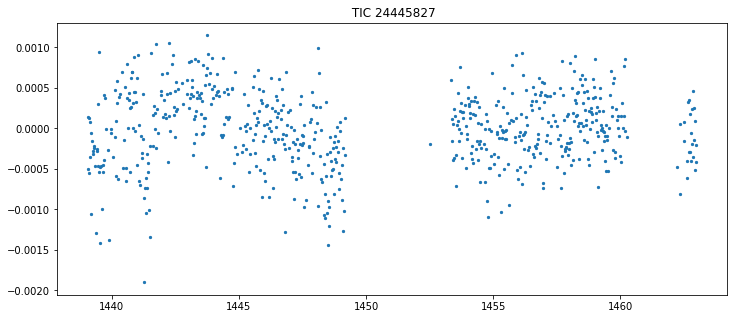

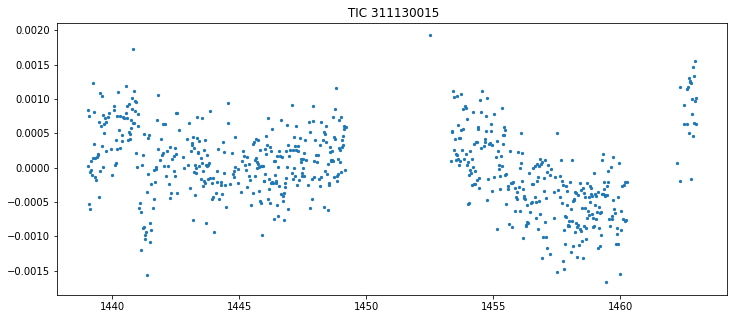

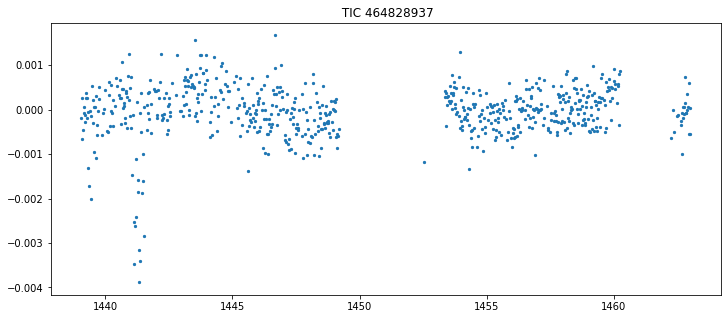

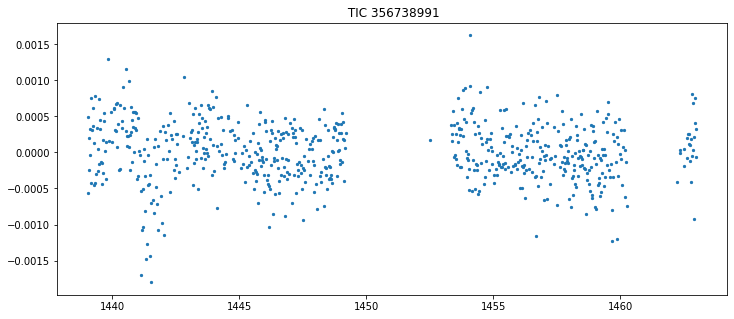

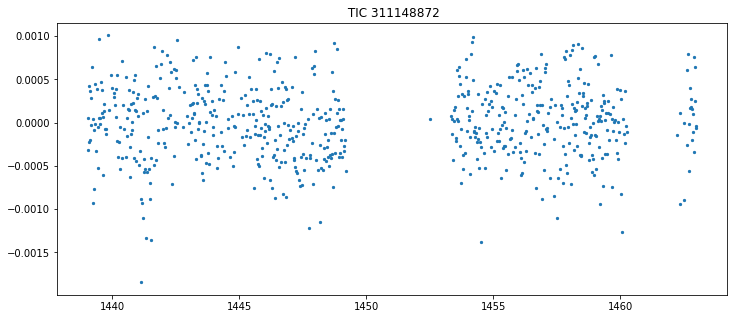

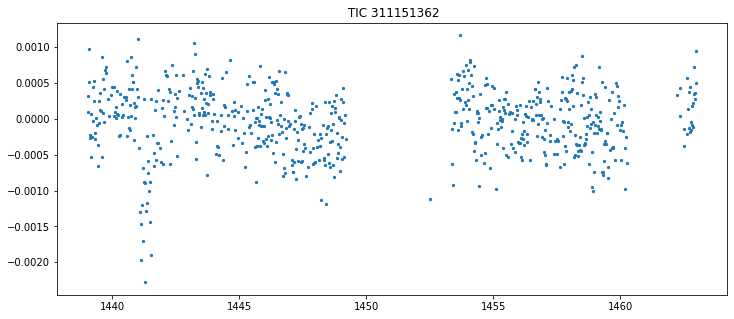

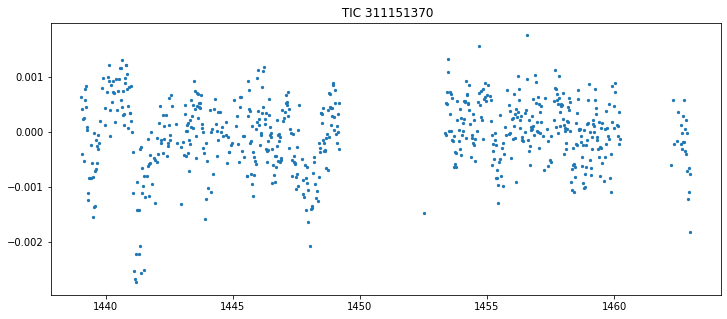

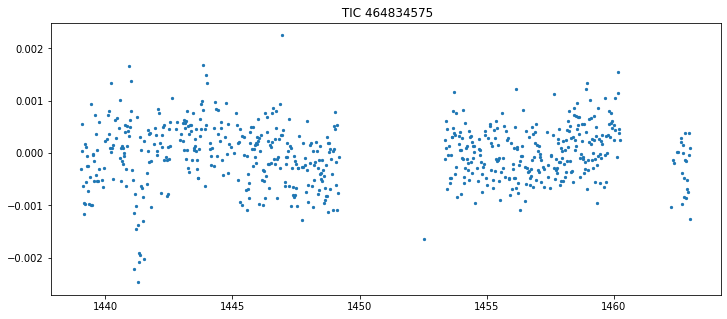

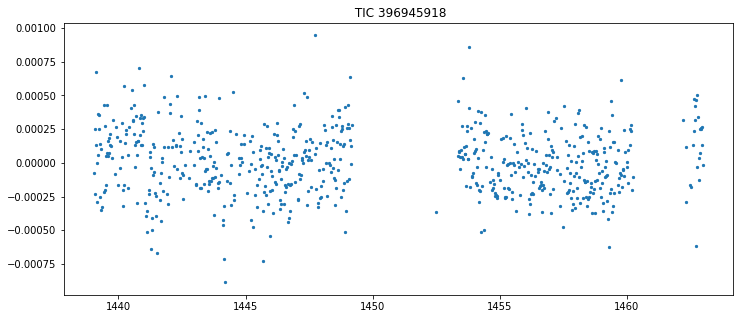

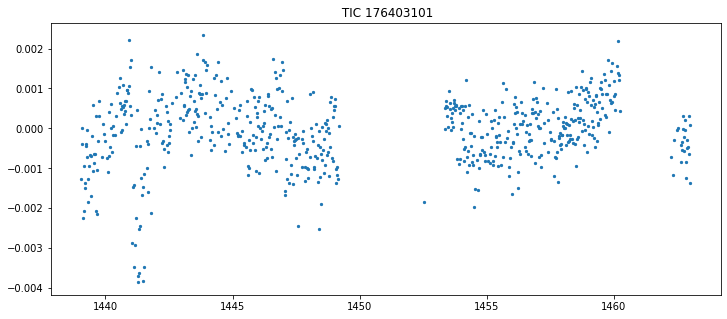

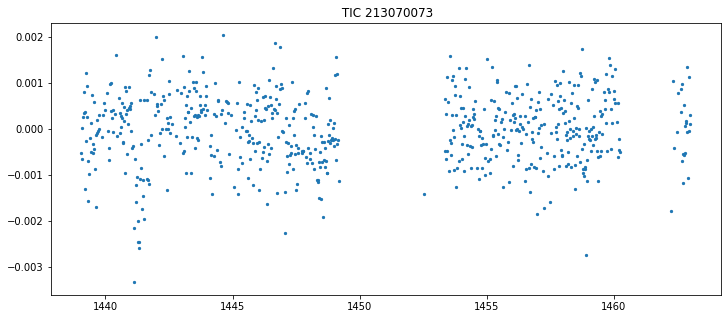

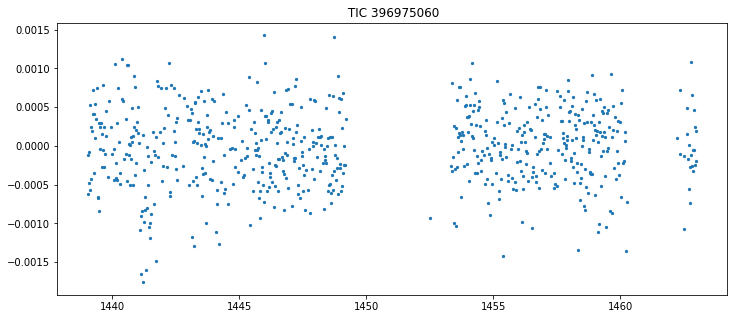

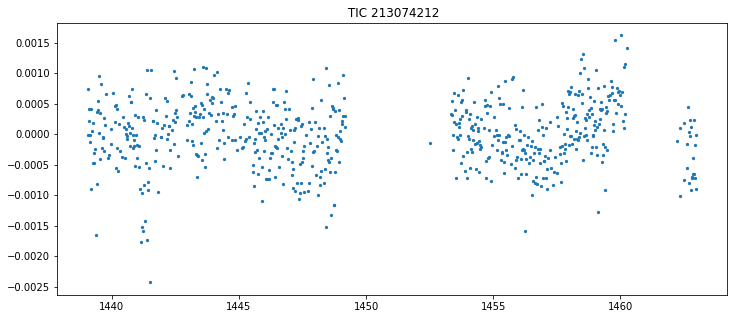

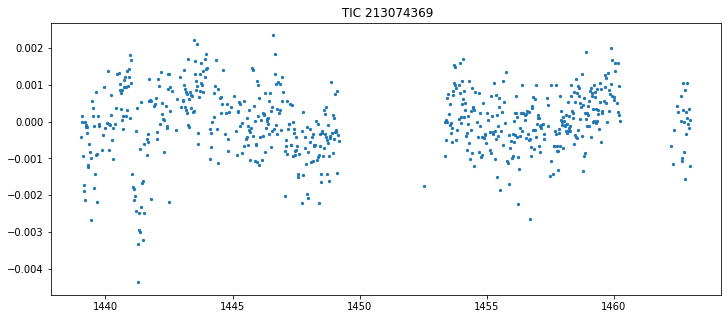

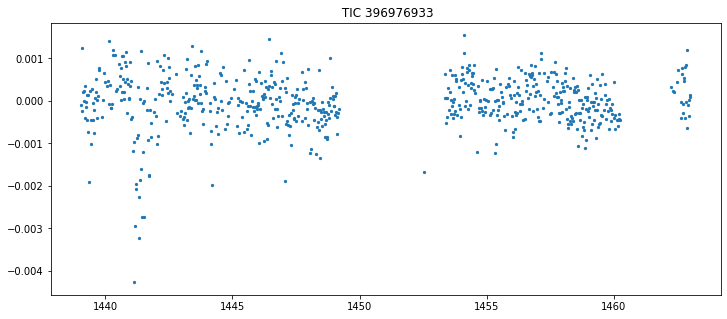

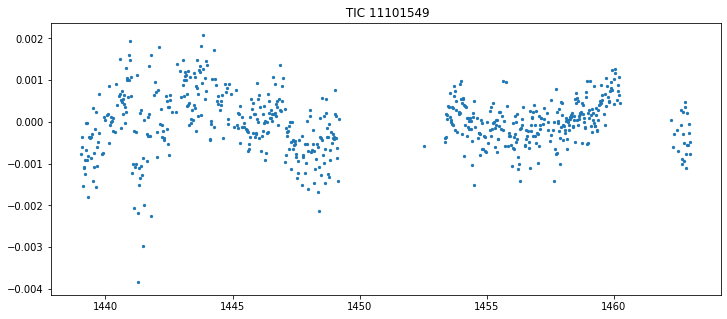

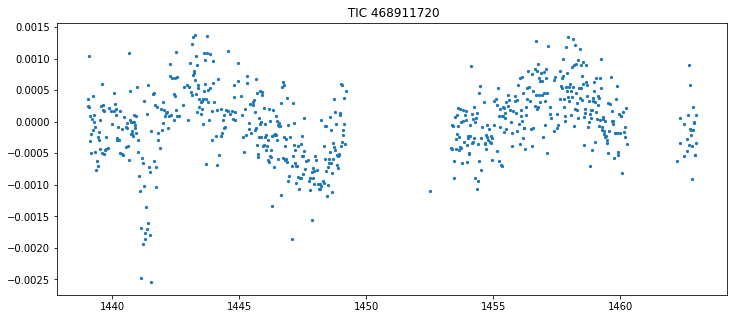

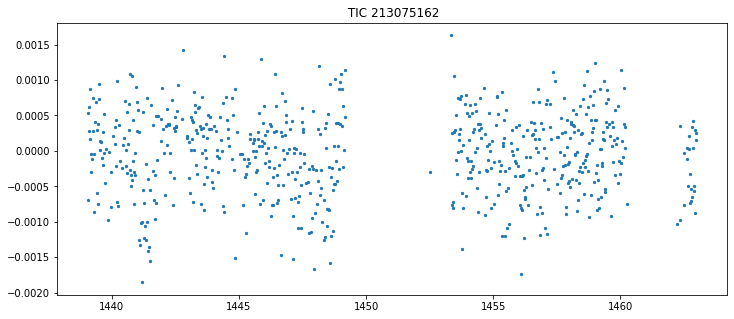

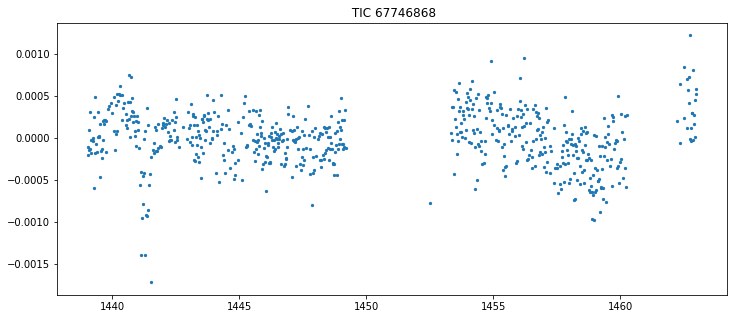

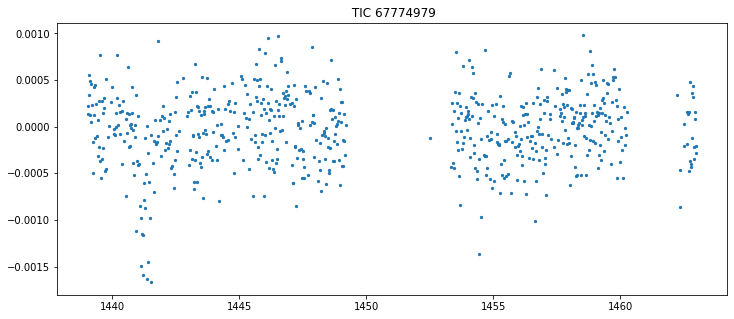

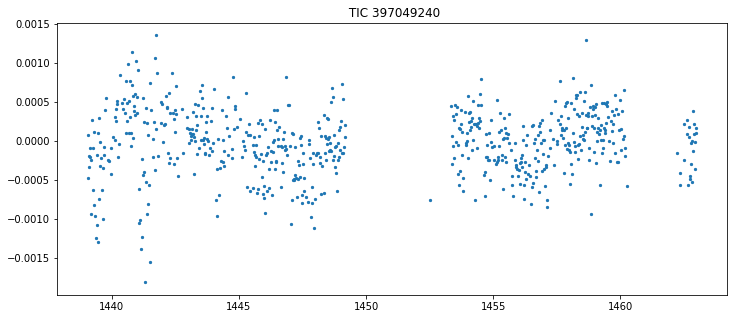

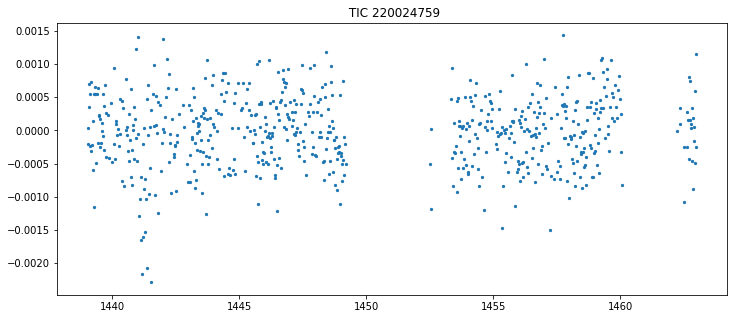

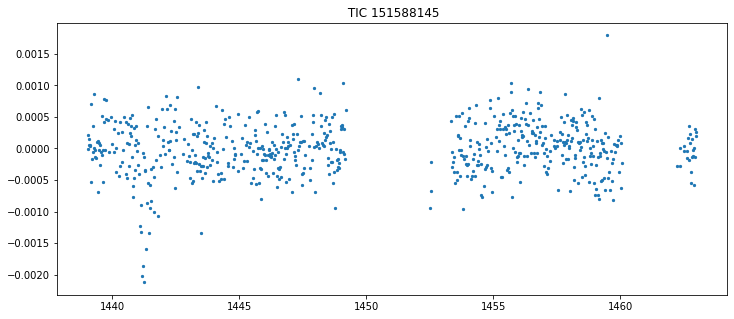

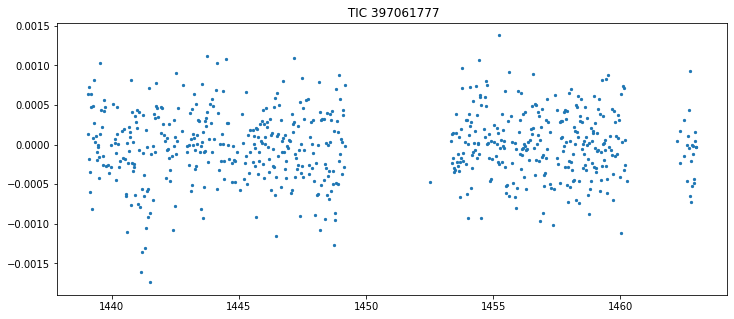

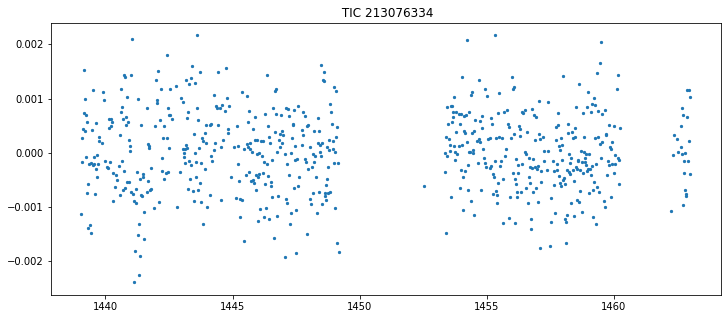

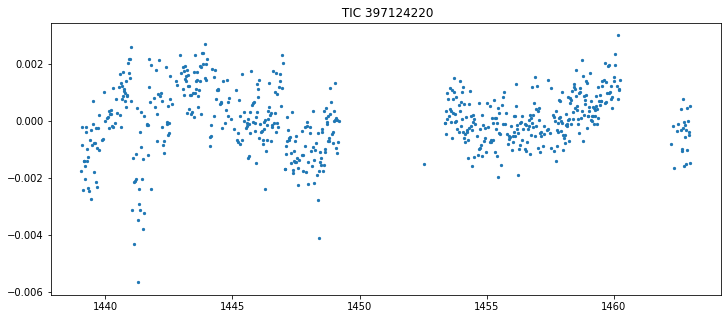

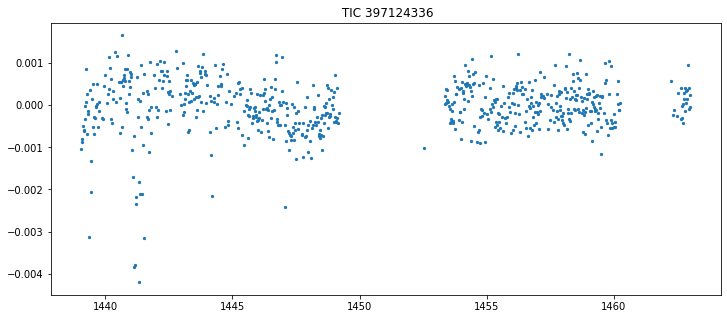

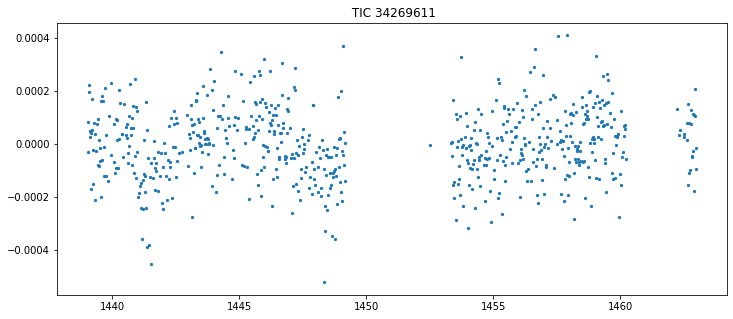

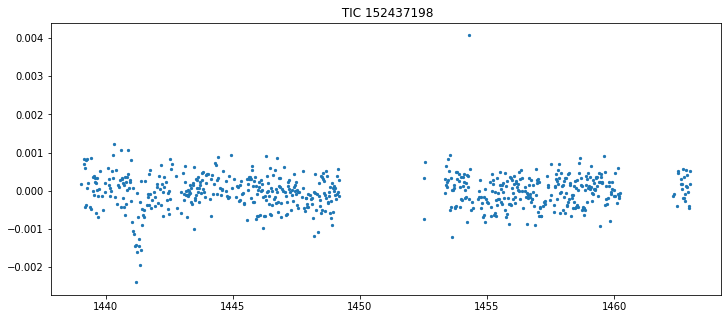

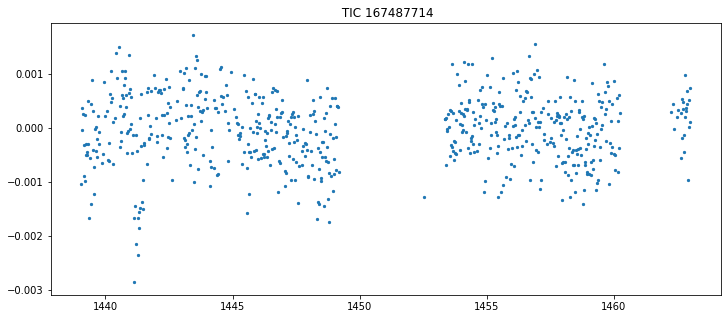

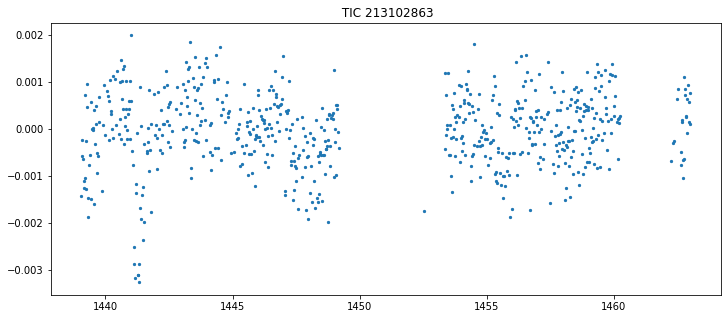

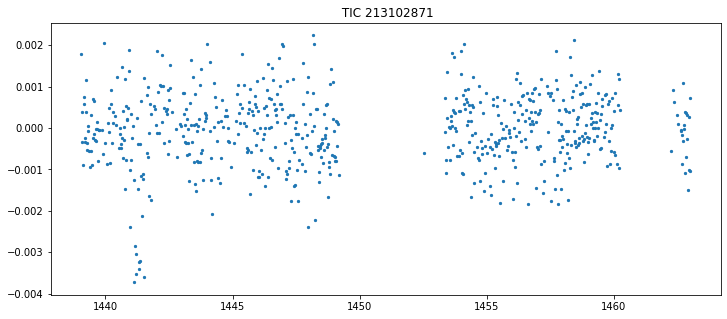

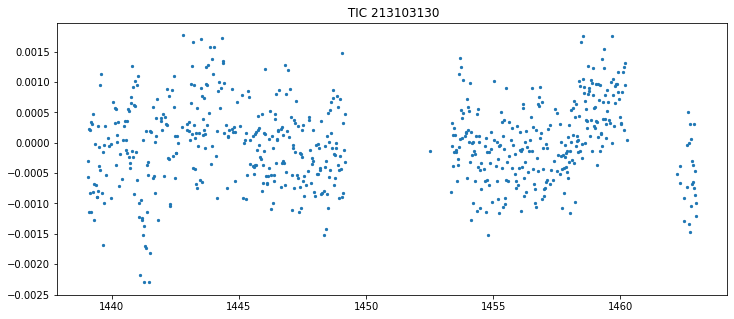

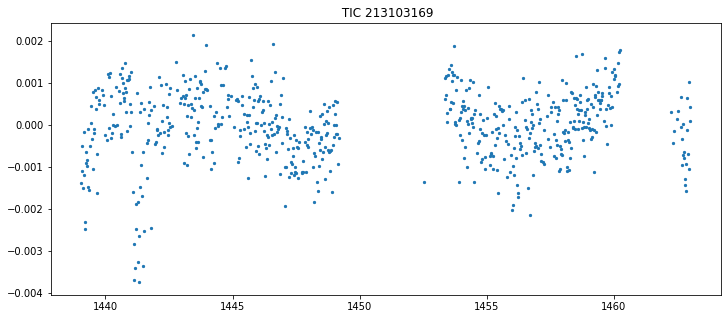

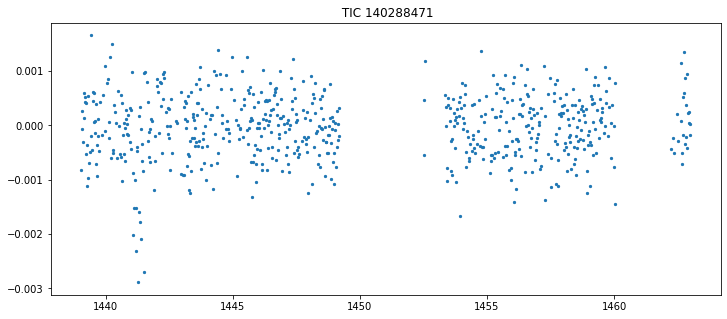

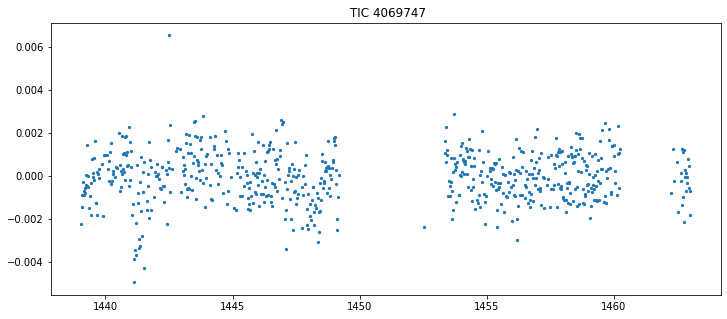

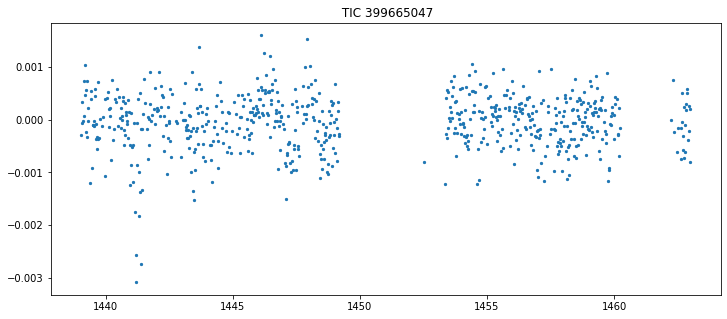

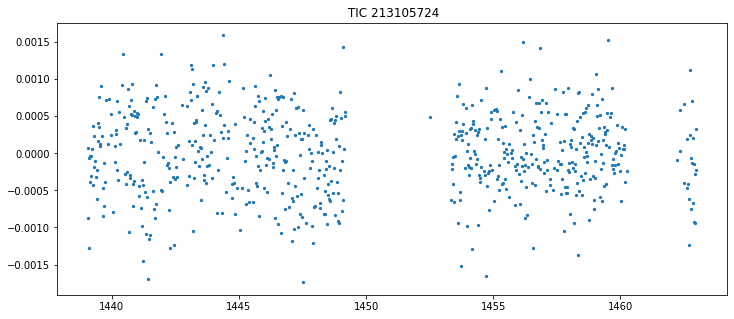

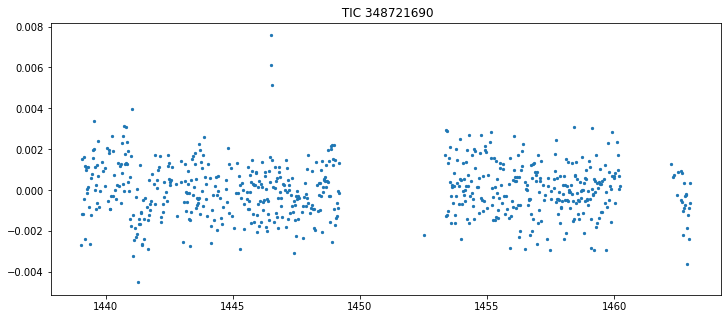

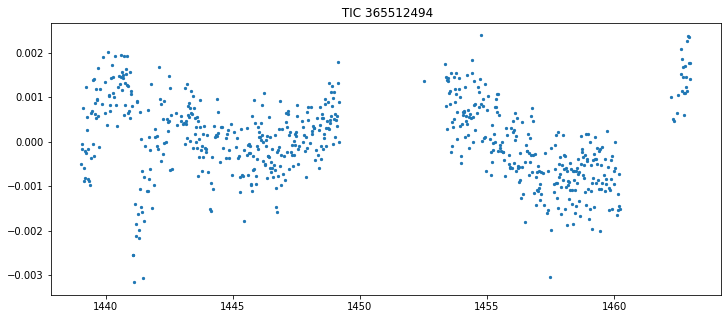

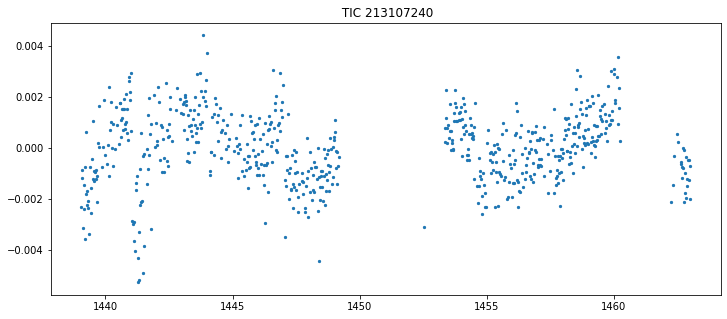

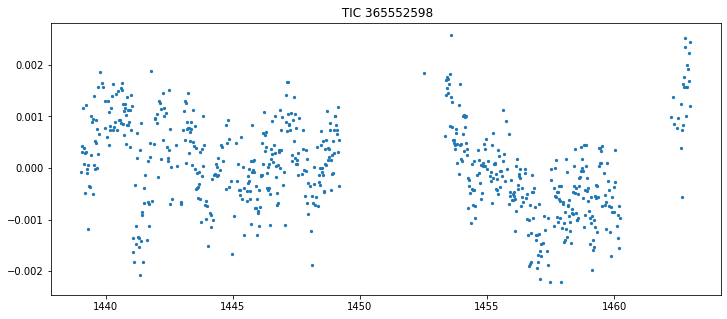

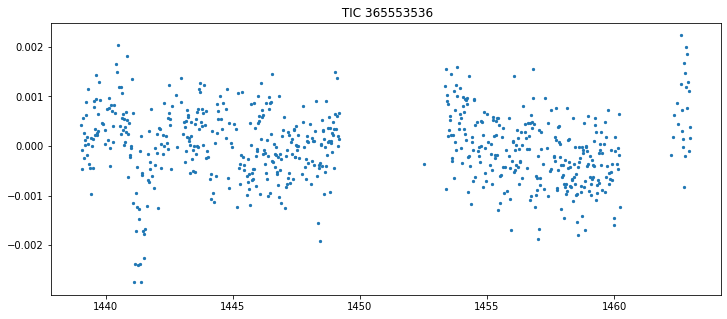

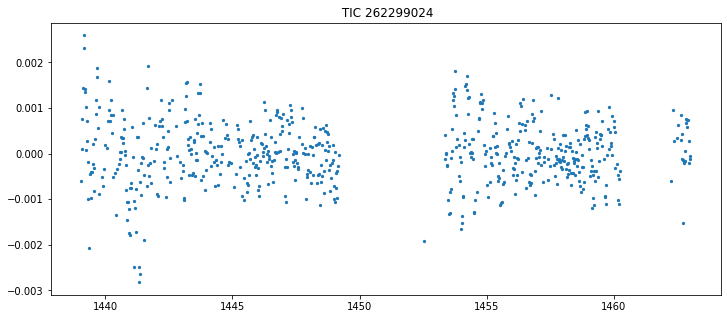

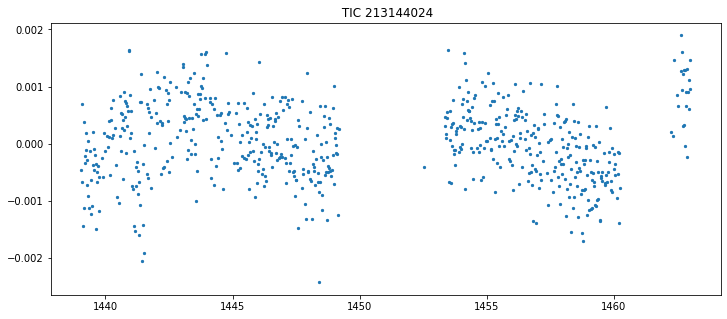

In [17]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()